# Part II - ProsperLoanData
## by Mary Maingi


## Investigation Overview
The main goal is to look at how the loan amount, borrower abr and borrower rate are affected by other variables like Debt to income ratio nd prosper rating.



## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv('prosperLoanData.csv')


In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df['DebtToIncomeRatio'].fillna((df['DebtToIncomeRatio'].mean()), inplace=True)

In [5]:
df['BorrowerAPR'].fillna((df['BorrowerAPR'].median()), inplace=True)

In [6]:
ordinal_rating = ['AA', 'A', 'B', 'C', 'D', 'E','HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ordered_var)

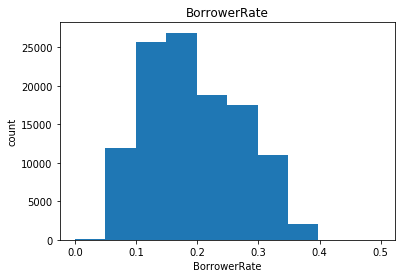

In [7]:
plt.hist(data=df, x='BorrowerRate')
plt.title('BorrowerRate')
plt.xlabel('BorrowerRate')
plt.ylabel('count')
plt.show()

**BorrowerRate**

BorrowerRate has a muiltmodal distribution of values with the highest peak at 0.15

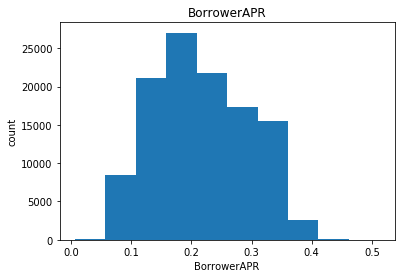

In [8]:
plt.hist(data=df, x='BorrowerAPR')
plt.title('BorrowerAPR')
plt.xlabel('BorrowerAPR')
plt.ylabel('count')
plt.show()

**BorrowerAPR**

BorrowerAPR has a muiltmodal distribution of values with the highest peak at 0.2.

Text(0,0.5,'count')

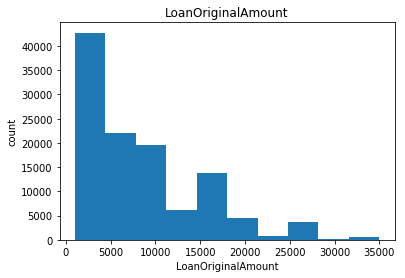

In [9]:
Loan_order=['1000','5000','10000','15000','20000','20000','25000','30000','35000']
plt.hist(data=df, x='LoanOriginalAmount')
plt.title('LoanOriginalAmount')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('count')

**LoanOriginalAmount**

The loan original mount has the highest bars representing less than 10,000

Text(0.5,1,'LoanOriginalAmount versus BorrowerAPR')

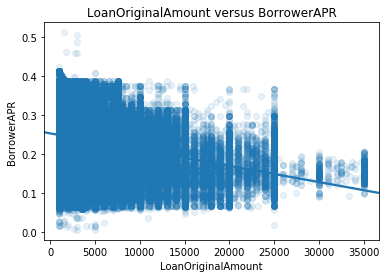

In [10]:
sb.regplot(data=df,x='LoanOriginalAmount', y='BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
plt.title('LoanOriginalAmount versus BorrowerAPR')

**Relationship between Loan Original Amount and BorrowerAPR**

The borrowerapr is high at some point but decreases as the loan amount increases. This shows that there is a negative correlation between borrowerapr and loan amount

Text(0.5,1,'BorrowerRate and DebtToIncomeRatio')

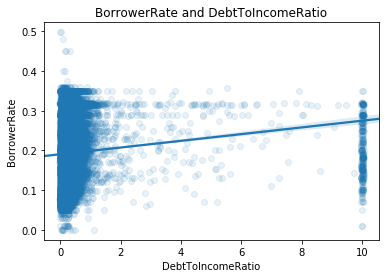

In [11]:
sb.regplot(data=df,x='DebtToIncomeRatio', y='BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1});
plt.title('BorrowerRate and DebtToIncomeRatio')

**Relationship between DebtToIncomeRatio and BorrowerRate**

The debt to income ratio and borrowerrate graph shows that as the rate increases the debt to income ratio decreases upto some point.This shows a negative correlation between the variables.

Text(0.5,1,'LoanOriginalAmount versus ProsperRating (Alpha)')

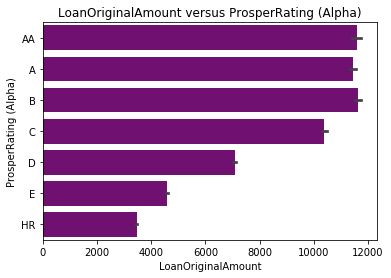

In [12]:
sb.barplot(data=df, x='LoanOriginalAmount', y='ProsperRating (Alpha)', color='purple')
plt.title('LoanOriginalAmount versus ProsperRating (Alpha)')

**Relationship between Loan Original Amount and Prosper Rating (Alpha)**

In this graph of loan original amount and prosper rating(alpha), it shows that rating 'C' has the largest loan amount followed by 'AA and A'.This are good ratings on the loan amount.

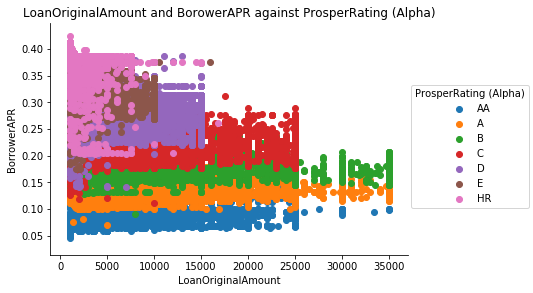

In [14]:
g = sb.FacetGrid(data = df, hue = 'ProsperRating (Alpha)', size = 4, aspect=1.5)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR')
plt.title('LoanOriginalAmount and BorowerAPR against ProsperRating (Alpha)')
g.add_legend()

**Effects of Rating on Loan original amount and BorrowerAPR.**

This graph of Loan amount against borrowerapr by prosper rating shows good ratings are seen when there is increase in loan amount and a small increase in borrower apr. The borrower apr increases with ratings from AA, A to B

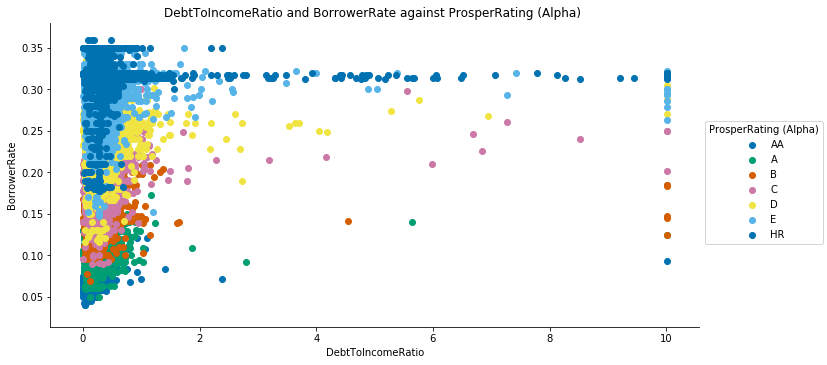

In [15]:
g = sb.FacetGrid(data = df, hue = 'ProsperRating (Alpha)', size = 5, aspect=2.0,
                 palette = 'colorblind')
g.map(plt.scatter, 'DebtToIncomeRatio', 'BorrowerRate')
plt.title('DebtToIncomeRatio and BorrowerRate against ProsperRating (Alpha) ')
g.add_legend()

**Effect of prosper rating on debt to income ratio and borrower rate**

This graph shows that as the borrower rate increases as the debt to income ratio decreases and this has a positive impact on the ratings as they move from bad(HR) to good rating(AA)

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert 'Part_II_slide_deck_template'.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 535762 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 